In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,LeakyReLU,ReLU,Flatten,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu,sigmoid,softmax

### VGG19

In [3]:
from tensorflow.keras.applications.vgg19 import VGG19

In [18]:
image_size = [224,224]

train_data = 'D:\\Finetuning techniques\\data\\archive\\Data\\train'
test_data = 'D:\\Finetuning techniques\\data\\archive\\Data\\test'

In [5]:
vgg19 = VGG19(input_shape=image_size + [3] , weights='imagenet' , include_top = False)

In [6]:
for layers in vgg19.layers:
    layers.trainable=False

In [7]:
x = Flatten()(vgg19.output)

In [8]:
from glob import glob

In [9]:
a = glob('D:\\Finetuning techniques\\data\\archive\\Data\\train\\*')

In [10]:
len(a)

3

In [11]:
predict = Dense(len(a) , activation = 'softmax')(x)

In [12]:
model = Model(inputs = vgg19.inputs ,outputs = predict)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,
)

In [23]:
testing_data = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = generator.flow_from_directory (
    train_data,
    target_size=image_size,
    class_mode='categorical',
    color_mode = 'rgb',
    batch_size=32,
    shuffle=True,
)

Found 5144 images belonging to 3 classes.


In [21]:
test_generator = generator.flow_from_directory (
    test_data,
    target_size=image_size,
    class_mode='categorical',
    color_mode = 'rgb',
    batch_size=32,
    shuffle=False,
)

Found 1288 images belonging to 3 classes.


In [22]:
test_generator.classes

array([0, 0, 0, ..., 2, 2, 2])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=6)

In [29]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [30]:
model.fit_generator(train_generator, validation_data=test_generator, epochs=10, callbacks=[stop])

C:\Users\korla\anaconda3\envs\TF\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
161/161 [==============================] - 1056s 7s/step - loss: 0.3894 - accuracy: 0.8734 - val_loss: 0.2056 - val_accuracy: 0.9317
Epoch 2/10
161/161 [==============================] - 1093s 7s/step - loss: 0.2035 - accuracy: 0.9228 - val_loss: 0.1855 - val_accuracy: 0.9363
Epoch 3/10
161/161 [==============================] - 1091s 7s/step - loss: 0.1768 - accuracy: 0.9347 - val_loss: 0.1689 - val_accuracy: 0.9394
Epoch 4/10
161/161 [==============================] - 1583s 10s/step - loss: 0.1402 - accuracy: 0.9502 - val_loss: 0.2961 - val_accuracy: 0.8944
Epoch 5/10
161/161 [==============================] - 1131s 7s/step - loss: 0.1780 - accuracy: 0.9392 - val_loss: 0.1820 - val_accuracy: 0.9356
Epoch 6/10
161/161 [==============================] - 1120s 7s/step - loss: 0.1208 - accuracy: 0.9528 - val_loss: 0.2059 - val_accuracy: 0.9278
Epoch 7/10
161/161 [==============================] - 1089s 7s/step - loss: 0.1144 - accuracy: 0.9592 - val_loss: 0.1515 - val_accuracy

In [31]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
train_loss = model.history.history['loss']
train_loss

[0.3894113302230835,
 0.2035280168056488,
 0.17682188749313354,
 0.14024175703525543,
 0.17799969017505646,
 0.12084456533193588,
 0.1143689677119255,
 0.13918036222457886,
 0.11664895713329315,
 0.13494464755058289]

In [33]:
test_loss = model.history.history['val_loss']
test_loss

[0.20556965470314026,
 0.185461163520813,
 0.1688598245382309,
 0.2960590720176697,
 0.18200021982192993,
 0.20592883229255676,
 0.15150634944438934,
 0.14030365645885468,
 0.2154628485441208,
 0.1495407372713089]

In [34]:
train_acc = model.history.history['accuracy']
train_acc

[0.8734447956085205,
 0.9228227138519287,
 0.9346811771392822,
 0.9502332806587219,
 0.9391524195671082,
 0.9527605175971985,
 0.9591757655143738,
 0.9479004740715027,
 0.9568428993225098,
 0.9521772861480713]

In [35]:
test_acc = model.history.history['val_accuracy']
test_acc

[0.9316770434379578,
 0.9363353848457336,
 0.9394409656524658,
 0.8944099545478821,
 0.9355590343475342,
 0.9277950525283813,
 0.9440993666648865,
 0.9526397585868835,
 0.91847825050354,
 0.9479813575744629]

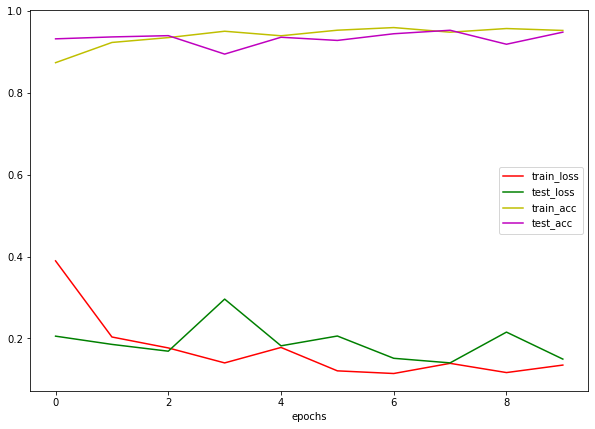

In [36]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(10),train_loss,color='r',label='train_loss')
plt.plot(np.arange(10),test_loss,color='g',label='test_loss')
plt.plot(np.arange(10),train_acc,color='y',label='train_acc')
plt.plot(np.arange(10),test_acc,color='m',label='test_acc')
plt.legend()
plt.xlabel('epochs')
plt.show()

In [38]:
y_test_pred = model.predict(test_generator)

In [39]:
y_test_pred

array([[9.9900156e-01, 2.8073561e-04, 7.1775506e-04],
       [9.9999964e-01, 9.9916626e-09, 3.0595649e-07],
       [9.9305832e-01, 3.3211286e-04, 6.6096359e-03],
       ...,
       [3.6172674e-03, 9.1771496e-04, 9.9546510e-01],
       [3.6785178e-04, 3.0340566e-03, 9.9659806e-01],
       [1.6474183e-06, 7.7202303e-06, 9.9999058e-01]], dtype=float32)

In [40]:
y_test_pred = np.argmax(y_test_pred,axis = 1)

In [41]:
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
test_generator.classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
confusion_matrix(test_generator.classes , y_test_pred)

array([[115,   1,   0],
       [  2, 268,  47],
       [  0,  19, 836]], dtype=int64)

In [45]:
print(classification_report(test_generator.classes,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       116
           1       0.93      0.85      0.89       317
           2       0.95      0.98      0.96       855

    accuracy                           0.95      1288
   macro avg       0.95      0.94      0.95      1288
weighted avg       0.95      0.95      0.95      1288



In [46]:
import cv2

In [47]:
labels = ['covid','normal','phenomia']

In [48]:
from tensorflow.keras.preprocessing import image

In [49]:
def fun(path):
    
    img = cv2.imread(path)
    im_resize = cv2.resize(img,(224,224),interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resize,cv2.COLOR_BGR2RGB))
    
    image_pred = image.load_img(path,target_size=(224,224))
    image_pred = image.img_to_array(image_pred)
    a = np.expand_dims(image_pred,axis = 0)
    
    result = model.predict(a)
    print(result)
    
    q = np.argmax(result,axis = 1)
    print(q)
    print(labels[q[0]])
    
    

[[9.9999869e-01 1.2806091e-06 0.0000000e+00]]
[0]
covid


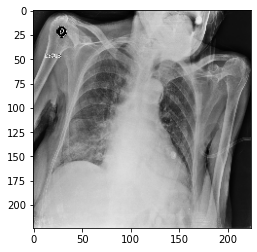

In [52]:
fun('D:\\Finetuning techniques\\data\\archive\\Data\\test\\COVID19\\2.jpg')

[[0.0000000e+00 1.3702955e-09 1.0000000e+00]]
[2]
phenomia


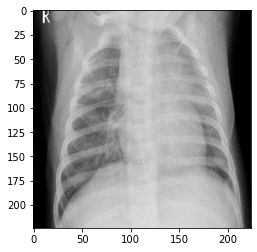

In [53]:
fun("D:\\Finetuning techniques\\data\\archive\\Data\\test\\PNEUMONIA\\2.jpg")

[[0. 0. 1.]]
[2]
phenomia


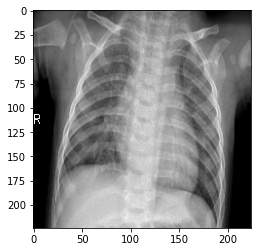

In [54]:
fun("D:\\Finetuning techniques\\data\\archive\\Data\\test\\PNEUMONIA\\3.jpg")

[[0. 1. 0.]]
[1]
normal


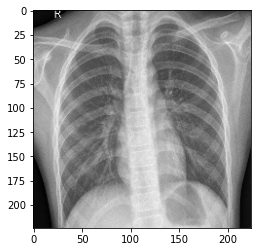

In [57]:
fun("D:\\Finetuning techniques\\data\\archive\\Data\\train\\Normal\\1.jpg")